In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#determining the total number of images and labels
digits = load_digits()
 
print('img data shape: ', digits.data.shape)
print('img data shape: ', digits.target.shape)

print(digits.data[0])
print(digits.target[0])

img data shape:  (1797, 64)
img data shape:  (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


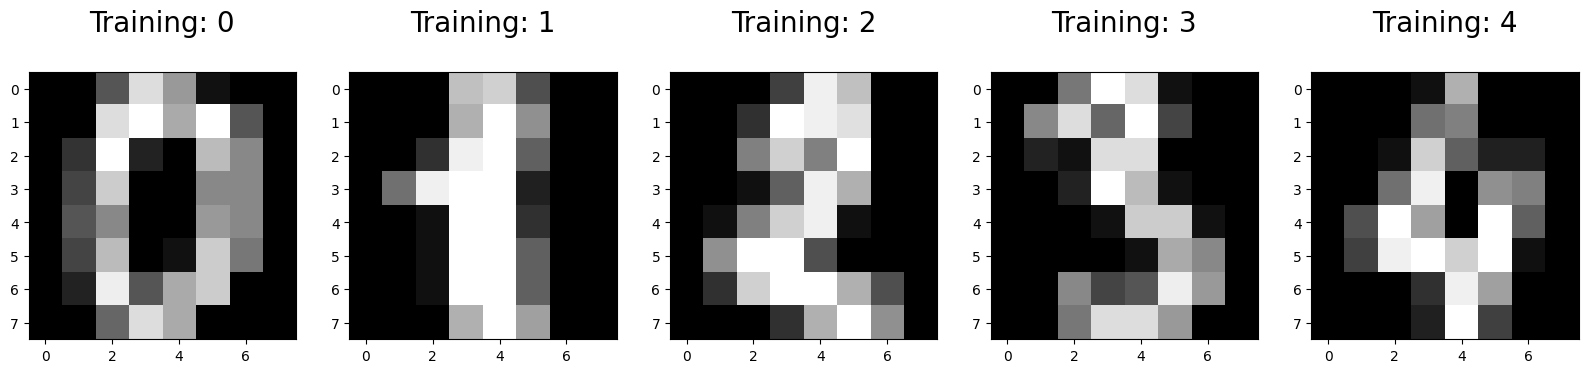

In [21]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])) :
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# #making an instance of the model and training it
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train, y_train)

(1383, 64)
(414, 64)
(1383,)
(414,)


LogisticRegression(max_iter=1000)

In [23]:
# Predicting the output of the first element of the test set
print(logisticRegr.predict(x_test[0].reshape(1, -1)))
print(y_train[0])

# Predicting the output of the first 10 elements of the test set
predictions = logisticRegr.predict(x_test[0:10])
print(predictions)


[4]
5
[4 0 9 1 8 7 1 5 1 6]


In [24]:
score = logisticRegr.score(x_test, y_test)
print(score) 

0.9516908212560387


In [25]:
pred = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

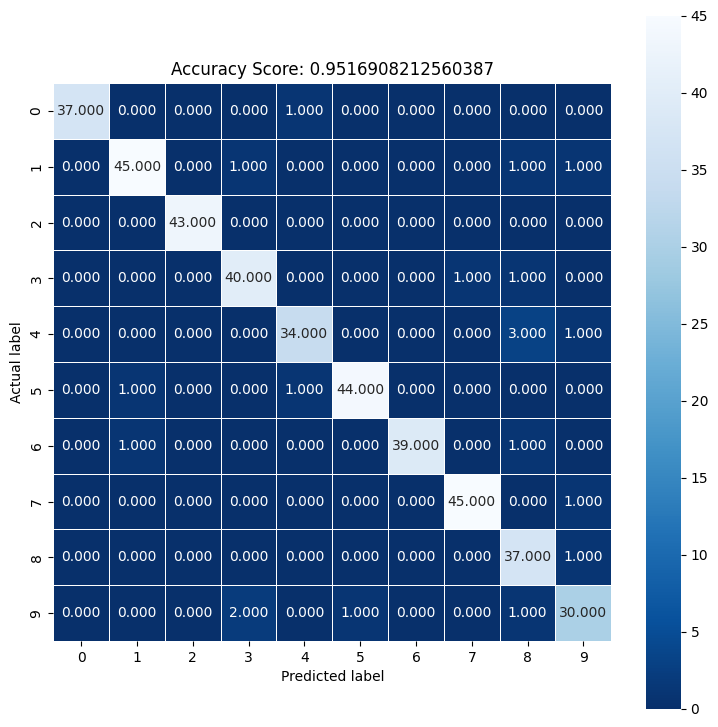

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square= True, cmap='Blues_r')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title(f"Accuracy Score: {score}")

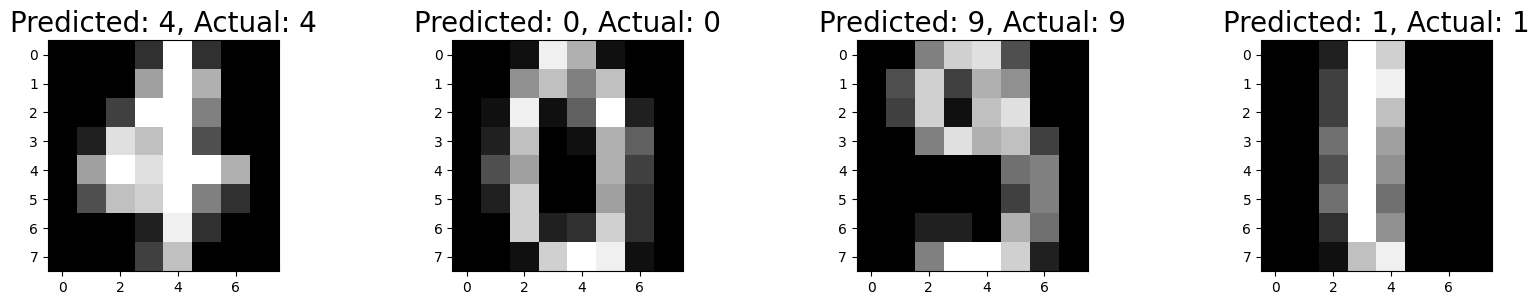

In [27]:
index = 0 
classification_index = []
for pred, actual in zip(predictions, y_test):
    if pred == actual:
        classification_index.append(index)
    index += 1
plt.figure(figsize=(20,3))

for plot_index, wrong in enumerate(classification_index[0:4]):
    plt.subplot(1, 4, plot_index + 1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title(f"Predicted: {predictions[wrong]}, Actual: {y_test[wrong]}", fontsize=20)